# MFCC, DTW

## DTW quick start

In [6]:
import dtw
from dtw import dtw

%pylab inline
x = array([0, 0, 1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)
y = array([1, 1, 1, 2, 2, 2, 2, 3, 2, 0]).reshape(-1, 1)
print(x.shape,y.shape)

Populating the interactive namespace from numpy and matplotlib
(10, 1) (10, 1)


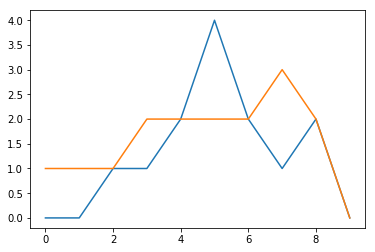

In [7]:
plot(x)
plot(y)

In [8]:
dist, cost, acc, path = dtw(x, y, dist=lambda x, y: norm(x - y, ord=1))
print('Minimum distance found:', dist)

Minimum distance found: 0.2


(array([0, 1, 2, 3, 4, 4, 4, 4, 5, 6, 7, 8, 9]), array([0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 8, 9])) 
 [[1. 1. 1. 2. 2. 2. 2. 3. 2. 0.]
 [1. 1. 1. 2. 2. 2. 2. 3. 2. 0.]
 [0. 0. 0. 1. 1. 1. 1. 2. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 2. 1. 1.]
 [1. 1. 1. 0. 0. 0. 0. 1. 0. 2.]
 [3. 3. 3. 2. 2. 2. 2. 1. 2. 4.]
 [1. 1. 1. 0. 0. 0. 0. 1. 0. 2.]
 [0. 0. 0. 1. 1. 1. 1. 2. 1. 1.]
 [1. 1. 1. 0. 0. 0. 0. 1. 0. 2.]
 [1. 1. 1. 2. 2. 2. 2. 3. 2. 0.]] 
 [[ 1.  2.  2.  2.  3.  6.  7.  7.  8.  9.]
 [ 2.  2.  2.  2.  3.  6.  7.  7.  8.  9.]
 [ 3.  3.  2.  2.  3.  6.  7.  7.  8.  9.]
 [ 5.  5.  3.  3.  2.  4.  4.  5.  5.  7.]
 [ 7.  7.  4.  4.  2.  4.  4.  5.  5.  7.]
 [ 9.  9.  5.  5.  2.  4.  4.  5.  5.  7.]
 [11. 11.  6.  6.  2.  4.  4.  5.  5.  7.]
 [14. 14.  8.  8.  3.  3.  4.  6.  6.  8.]
 [16. 16.  9.  9.  3.  5.  3.  4.  4.  6.]
 [16. 16. 10. 10.  5.  7.  5.  4.  6.  4.]]


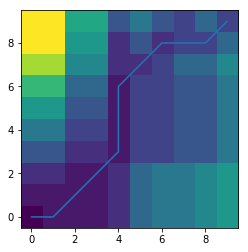

In [19]:
imshow(acc.T, origin='lower', interpolation='nearest')
print(path,'\n',cost,'\n',acc.T) # x,y coordinate
plot(path[0],path[1])

### Another dist funciton

In [36]:
from numpy.linalg import norm

def my_custom_norm(x, y):
    return (x * x) + (y * y)


x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
y = [0] * 5 + x

x = array(x).reshape(-1, 1)
y = array(y).reshape(-1, 1)

dist, cost, acc, path = dtw(x, y, dist=norm)

(-0.5, 14.5)

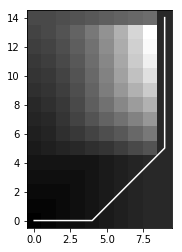

In [37]:
imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
xlim((-0.5, acc.shape[0]-0.5))
ylim((-0.5, acc.shape[1]-0.5))

## MFCC 

In [38]:
import IPython.display as ipd

In [39]:
import librosa
y1, sr1 = librosa.load('audio_files\jackhammer.wav')
ipd.Audio(y1, rate=sr1)

In [44]:
import librosa

y1, sr1 = librosa.load('./sounds/10.wav')
y2, sr2 = librosa.load('./sounds/78.wav')

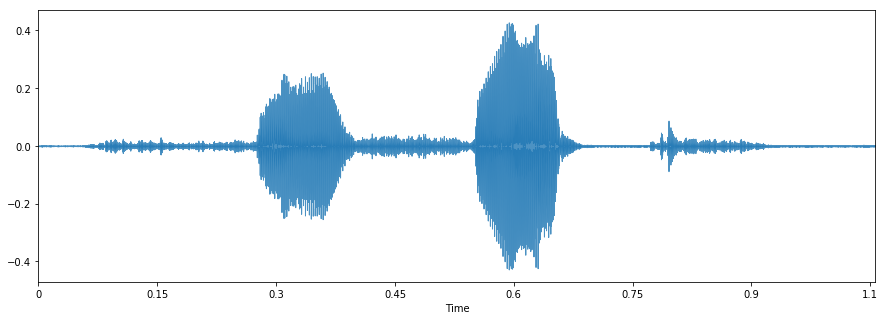

In [46]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(y1, sr1, alpha=0.8)

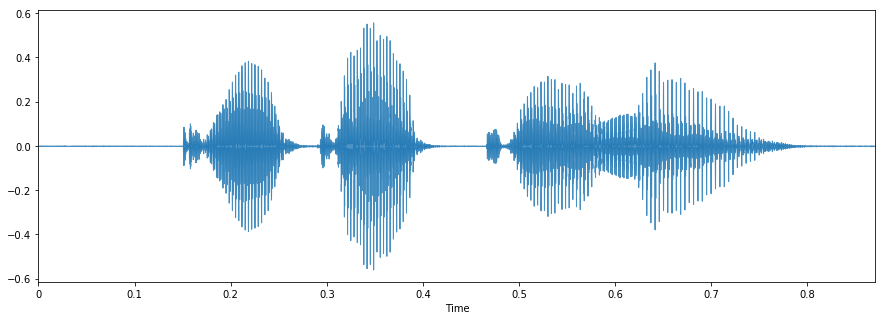

In [47]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(y2, sr2, alpha=0.8)

(20, 46)
(20, 38)


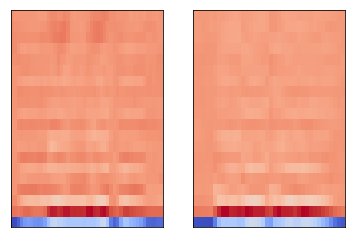

In [49]:
import matplotlib.pyplot as plt
import librosa.display 
%matplotlib inline

plt.subplot(1, 2, 1)
mfcc1 = librosa.feature.mfcc(y1, sr1)
librosa.display.specshow(mfcc1)

plt.subplot(1, 2, 2)
mfcc2 = librosa.feature.mfcc(y2, sr2)
librosa.display.specshow(mfcc2)

print(mfcc1.shape)
print(mfcc2.shape)


In [50]:
dist, cost, acc_cost, path = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
print('Normalized distance between the two sounds:', dist)

Normalized distance between the two sounds: 192.4817134312221


(46, 38) 
 [[168.70817566 176.17895508 167.74356079 ... 257.34802246 187.98379517
  180.81347656]
 [137.87467957 145.58444214 143.71405029 ... 233.96282959 159.70509338
  152.17900085]
 [280.17962646 284.05465698 261.96176147 ... 258.14587402 273.70324707
  279.40136719]
 ...
 [256.13314819 262.44555664 254.01846313 ... 210.34666443 203.94702148
  202.88014221]
 [248.47120667 249.52742004 255.9894104  ... 233.92929077 209.39959717
  229.92018127]
 [260.76333618 261.40686035 272.73190308 ... 243.36738586 214.78190613
  246.18554688]]


(-0.5, 37.5)

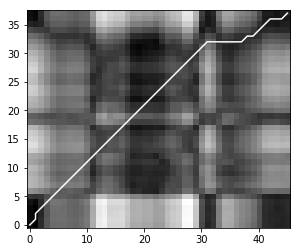

In [55]:
print(cost.shape,'\n',cost)
plt.imshow(cost.T, origin='lower', cmap=plt.cm.gray, interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, cost.shape[0]-0.5))
plt.ylim((-0.5, cost.shape[1]-0.5))